In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pickle


In [2]:

train= pd.read_parquet('D:/ashutosh_adaptready/featured_train.parquet')
test= pd.read_parquet('D:/ashutosh_adaptready/featured_test.parquet')

Line plot for Oil Temperature (OT) over time

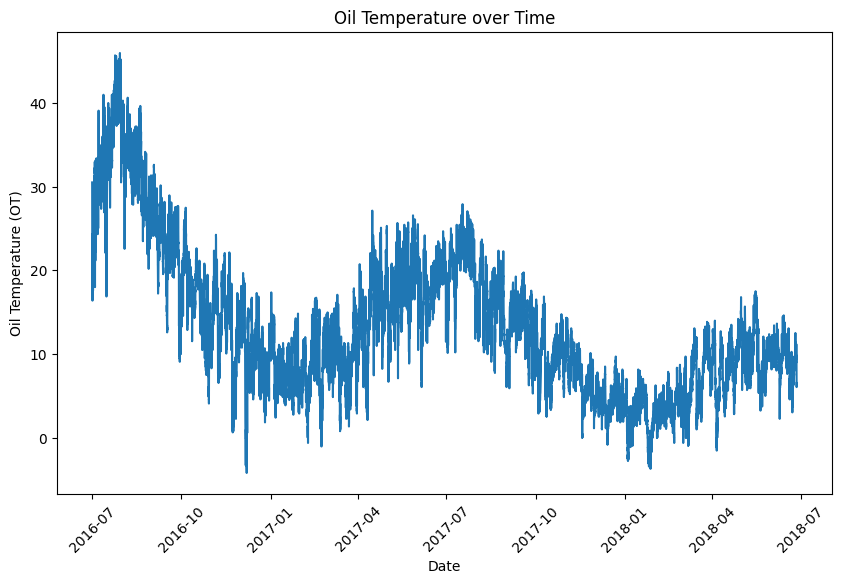

In [3]:

# 1. Line plot for Oil Temperature (OT) over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=train['date'], y=train['OT'])
plt.title('Oil Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.xticks(rotation=45)
plt.show()


Pairplot for the raw features (no scaling) and  Heatmap for correlation between raw features

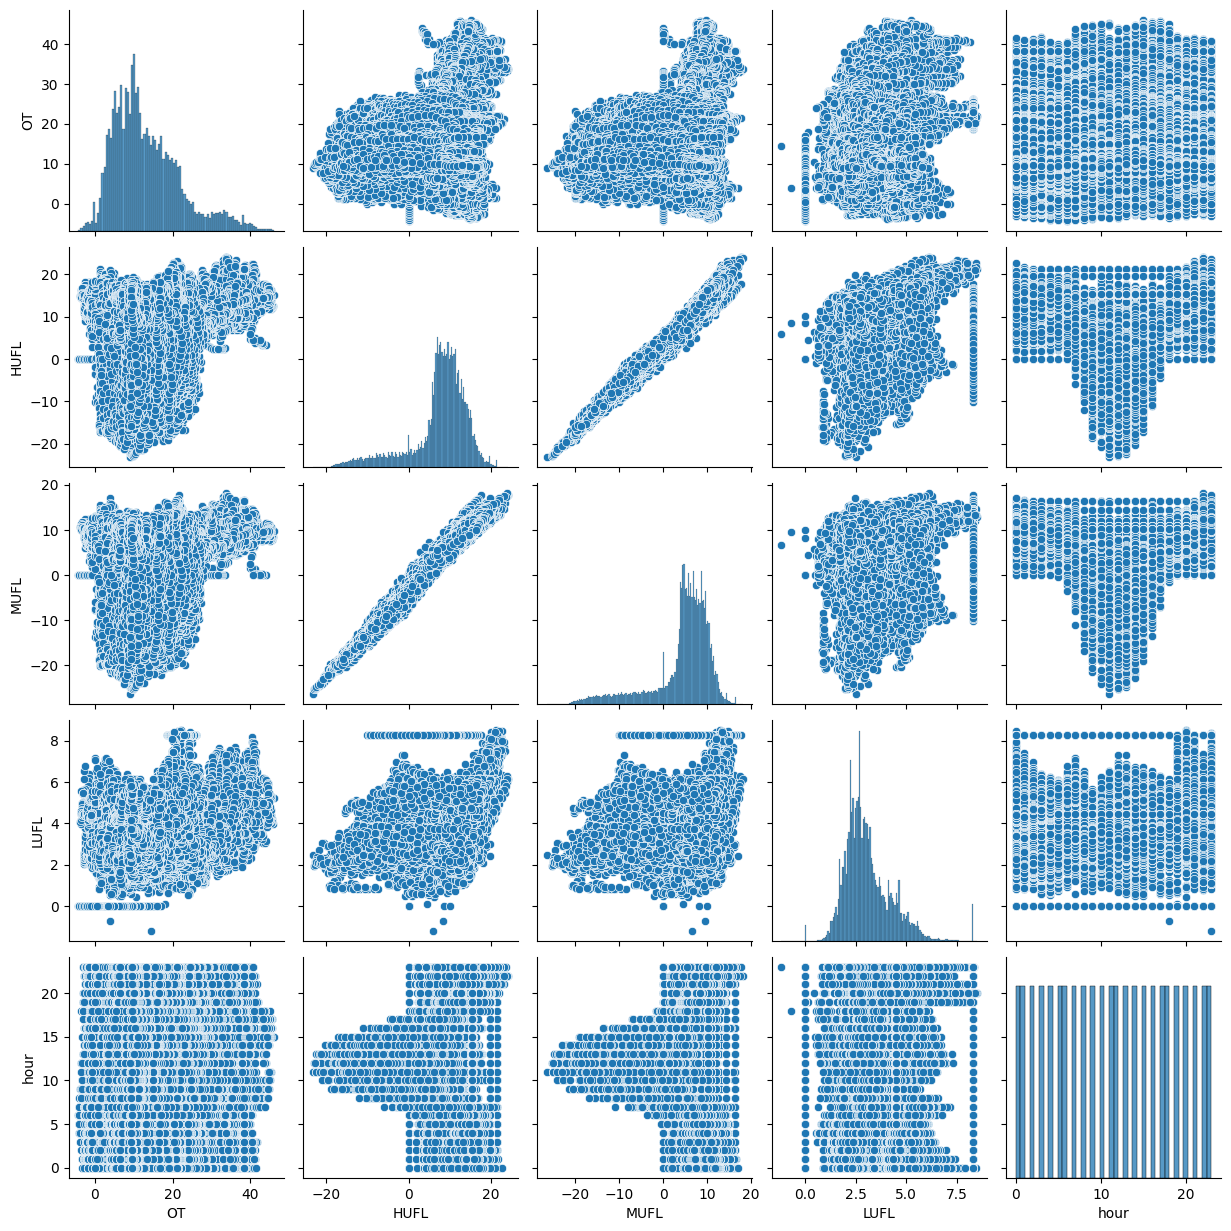

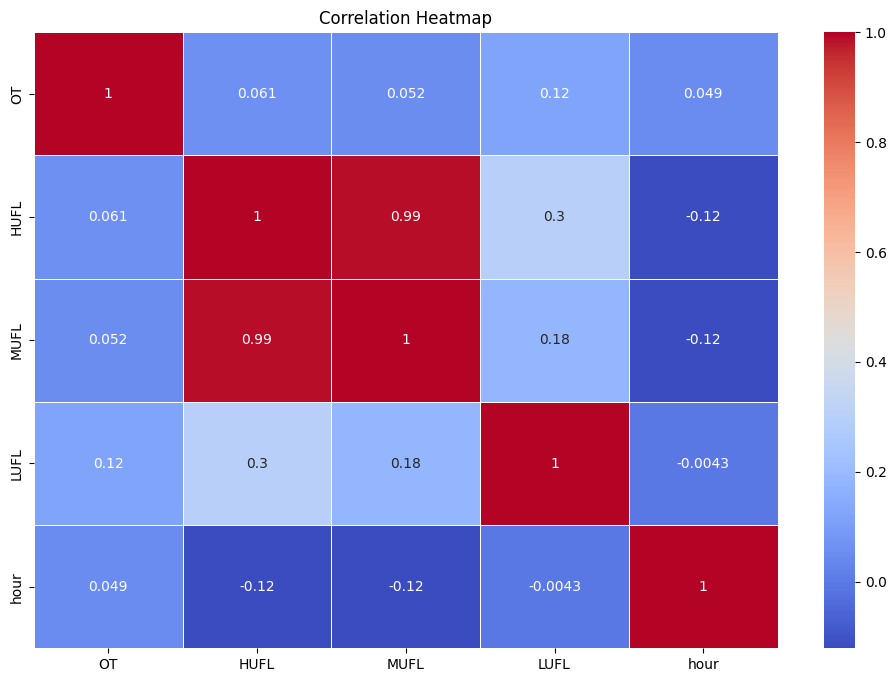

In [4]:

# 2. Pairplot for the raw features (no scaling)
sns.pairplot(train[['OT', 'HUFL', 'MUFL', 'LUFL', 'hour']])
plt.show()

# 3. Heatmap for correlation between raw features
corr_matrix = train[['OT', 'HUFL', 'MUFL', 'LUFL', 'hour']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


checking the summary statistics of the dataset to identify any extreme values, skewness, or anomalies.

In [5]:
# Check summary statistics
summary_stats = train.describe()
print(summary_stats)


                      date          hour     dayofweek         month  \
count                69696  69696.000000  69696.000000  69696.000000   
mean   2017-06-28 23:52:30     11.500000      3.001377      6.528926   
min    2016-07-01 00:00:00      0.000000      0.000000      1.000000   
25%    2016-12-29 11:56:15      5.750000      1.000000      4.000000   
50%    2017-06-28 23:52:30     11.500000      3.000000      7.000000   
75%    2017-12-27 11:48:45     17.250000      5.000000     10.000000   
max    2018-06-26 23:45:00     23.000000      6.000000     12.000000   
std                    NaN      6.922236      2.002423      3.457140   

               year            OT          HUFL          HULL          MUFL  \
count  69696.000000  69696.000000  69696.000000  69696.000000  69696.000000   
mean    2016.990358     13.319066      7.413642      2.261150      4.322200   
min     2016.000000     -4.221000    -23.242001     -5.693000    -26.367001   
25%     2016.000000      6.964000  

Scatter plot between OT and load features to see the impact of load on OT

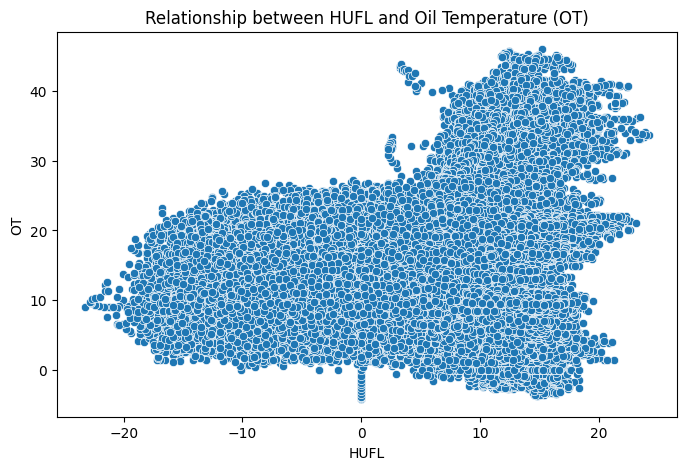

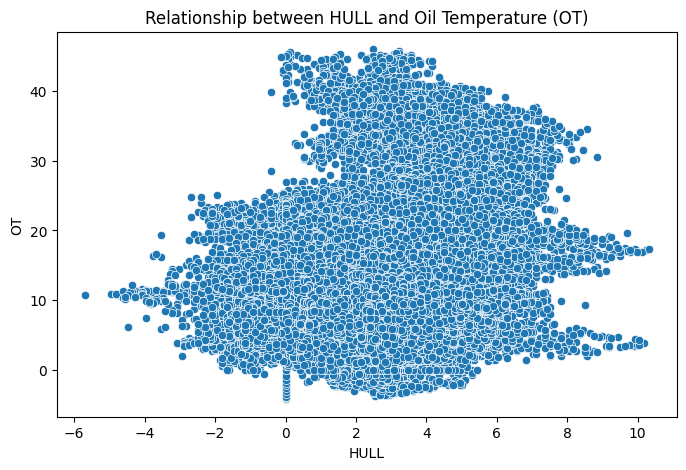

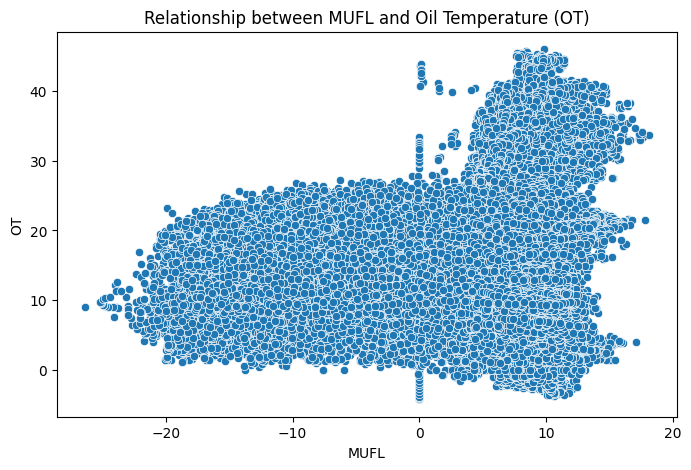

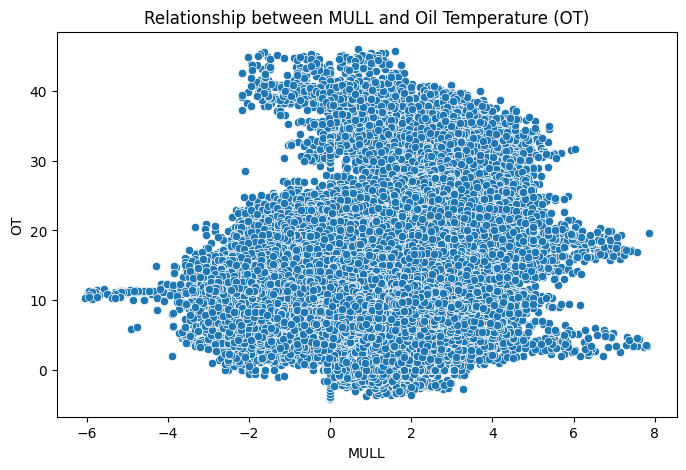

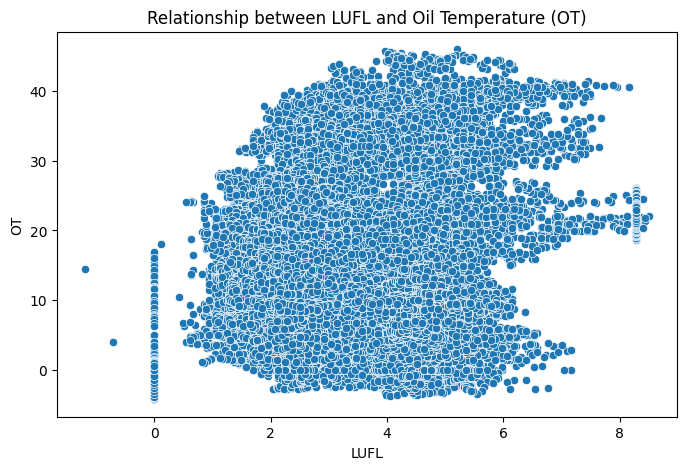

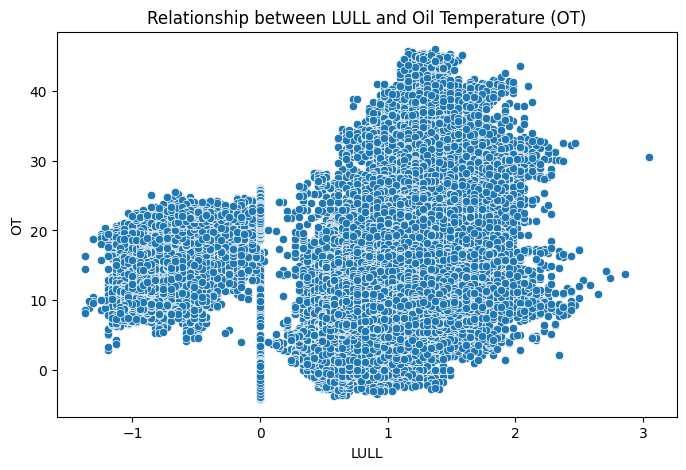

In [6]:
# Scatter plot between OT and load features to see the impact of load on OT
for feature in ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train[feature], y=train['OT'])
    plt.title(f'Relationship between {feature} and Oil Temperature (OT)')
    plt.show()


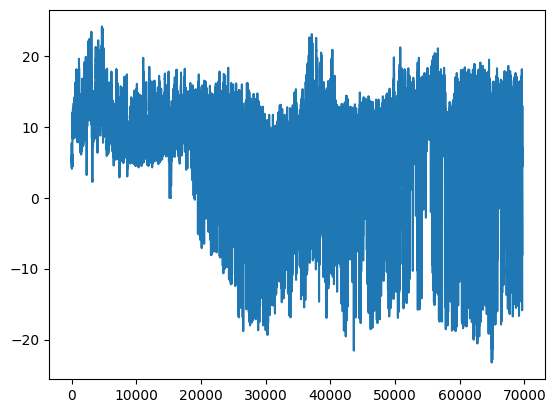

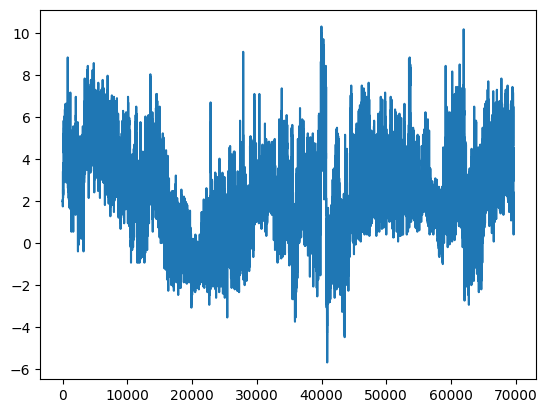

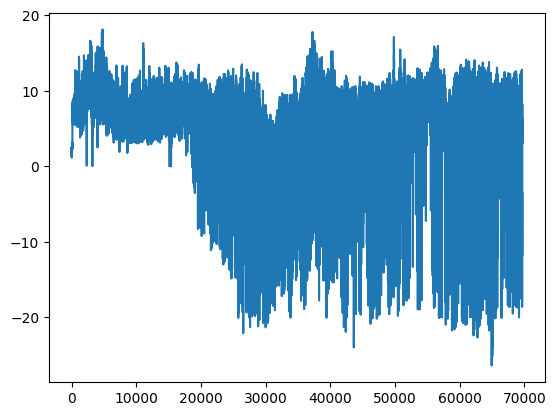

In [9]:
train['HUFL'].plot()
plt.show()
train['HULL'].plot()
plt.show()
train['MUFL'].plot()
plt.show()
train['MULL'].plot()
plt.show()
train['LUFL'].plot()
plt.show()
train['LULL'].plot()
plt.show()
